In [1]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("sp500_all_5y.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
def stock_hist(df,ticker,pred_days):
    stock = df[df['Ticker']== ticker]
    stock = stock.reset_index()
    stock = stock.drop(columns = "index")
    stock_pred = pd.DataFrame(stock, columns = ['Ticker','Date','Close','Prediction'])
    stock_pred['Prediction'] = stock_pred['Close'].shift(-pred_days)
    return stock_pred

In [4]:
from sklearn.model_selection import train_test_split
def split_data(stock_pred,pred_days):
    X = np.array(stock_pred['Close'][:-pred_days])
    y = np.array(stock_pred['Prediction'][:-pred_days])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    x_pred = np.array(stock_pred['Close'][-pred_days:])
    return x_train, x_test, y_train, y_test, x_pred

In [5]:
pred_days = 30
apple_pred = stock_hist(df,"AAPL",pred_days)
x_train, x_test, y_train, y_test, x_pred = split_data(apple_pred,pred_days)

#### Support Vector Regression

In [6]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
svm_confidence = svr_rbf.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
print("svm confidence: ", svm_confidence)

svm confidence:  0.941374874954749


In [8]:
y_svm_pred = svr_rbf.predict(x_pred.reshape(-1, 1))
y_svm_pred

array([118.65438335, 116.00238886, 114.53868308, 114.27356386,
       118.11936243, 116.30326417, 116.54496487, 116.94434929,
       114.5855025 , 108.57144889, 117.63863625, 115.76637664,
       118.36183868, 116.84618762, 114.43649322, 114.46142937,
       118.66859985, 110.12885664, 115.2698989 , 114.80312824,
       115.14125554, 108.65740142, 114.23090095, 108.5620733 ,
       108.75043868, 118.66280804, 118.16771294, 109.50755875,
       108.75072724, 108.85067969])

#### Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr_confidence = lr.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
print("lr confidence: ", lr_confidence)

lr confidence:  0.9235279376985549


In [11]:
y_lr_pred = lr.predict(x_pred.reshape(-1, 1))
y_lr_pred

array([[122.54849564],
       [119.01552613],
       [121.04645853],
       [120.93009575],
       [123.04565269],
       [130.90493467],
       [127.41426934],
       [127.50946791],
       [127.00173683],
       [125.21408785],
       [121.99845229],
       [123.61685218],
       [122.9398801 ],
       [121.75516077],
       [121.00414626],
       [121.01472029],
       [122.65426823],
       [116.94227337],
       [121.30031599],
       [114.46708637],
       [114.37187972],
       [116.13837256],
       [120.90893961],
       [125.22466996],
       [125.08162959],
       [122.57037126],
       [122.19951237],
       [125.92930589],
       [125.63261878],
       [125.68560209]])

#### k-nearest neighbor regression

In [12]:
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

In [13]:
knn_confidence = knn_model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
print("knn confidence: ", knn_confidence)

knn confidence:  0.943291588144264


In [14]:
y_knn_pred=knn_model.predict(x_pred.reshape(-1, 1))
y_knn_pred

array([[117.51362457],
       [114.353862  ],
       [114.71023102],
       [114.71023102],
       [117.51362457],
       [115.13736115],
       [116.48902893],
       [116.50899353],
       [117.35466766],
       [117.99279633],
       [116.58808594],
       [117.51362457],
       [117.51362457],
       [116.58808594],
       [114.71023102],
       [114.71023102],
       [117.51362457],
       [111.73722534],
       [115.05363922],
       [111.22610626],
       [111.22610626],
       [110.13598633],
       [114.71023102],
       [117.99279633],
       [117.99279633],
       [117.51362457],
       [117.45971527],
       [117.99279633],
       [117.99279633],
       [117.99279633]])

#### Random Forest Regression

In [15]:
rf = RandomForestRegressor()
# rf = RandomForestRegressor(n_estimators=1, bootstrap=True, min_samples_leaf=25)

In [16]:
rf_model = rf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [17]:
rf_confidence = rf_model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
print("rf confidence: ", rf_confidence)

rf confidence:  0.9399468358571345


In [21]:
y_rf_pred=rf_model.predict(x_pred.reshape(-1, 1))
y_rf_pred

array([118.79777069, 116.64378891, 113.06300735, 115.17969513,
       118.24948883, 116.06276398, 116.54293365, 116.54293365,
       117.22375946, 116.98778534, 118.03942871, 117.74123383,
       118.24948883, 116.87897339, 113.06300735, 113.06300735,
       118.24948883, 110.94459305, 114.88479462, 112.62170105,
       112.62170105, 113.15976791, 115.17969513, 116.98778534,
       116.98778534, 118.81374359, 118.03942871, 117.54282379,
       117.54282379, 117.54282379])

In [24]:
predict_table = pd.DataFrame(columns=['Date','Close','y_svm_pred','y_lr_pred','y_knn_pred','y_rf_pred'])

In [26]:
predict_table['Date'] = apple_pred['Date'][-pred_days:]
predict_table['Close'] = apple_pred['Close'][-pred_days:]
predict_table['y_svm_pred'] = y_svm_pred
predict_table['y_lr_pred'] = y_lr_pred
predict_table['y_knn_pred'] = y_knn_pred
predict_table['y_rf_pred'] = y_rf_pred

In [27]:
predict_table

,Date,Close,y_svm_pred,y_lr_pred,y_knn_pred,y_rf_pred
1229,2020-10-05,116.299355,118.654383,122.548496,117.513625,118.797771
1230,2020-10-06,112.965111,116.002389,119.015526,114.353862,116.643789
1231,2020-10-07,114.881805,114.538683,121.046459,114.710231,113.063007
1232,2020-10-08,114.771988,114.273564,120.930096,114.710231,115.179695
1233,2020-10-09,116.768547,118.119362,123.045653,117.513625,118.249489
1234,2020-10-12,124.185753,116.303264,130.904935,115.137361,116.062764
1235,2020-10-13,120.891434,116.544965,127.414269,116.489029,116.542934
1236,2020-10-14,120.981277,116.944349,127.509468,116.508994,116.542934
1237,2020-10-15,120.502106,114.585502,127.001737,117.354668,117.223759
1238,2020-10-16,118.815010,108.571449,125.214088,117.992796,116.987785


#### Visualization

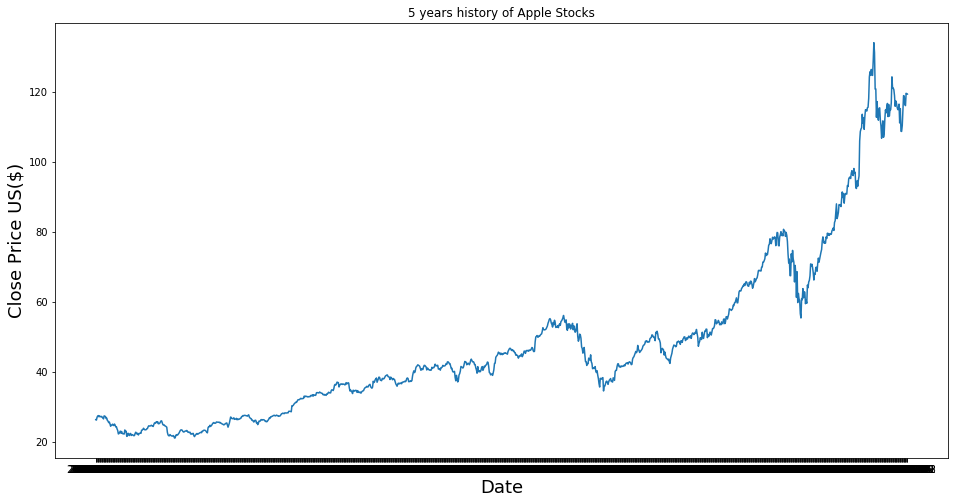

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('5 years history of Apple Stocks')
plt.plot(apple_pred['Date'],apple_pred['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.show()

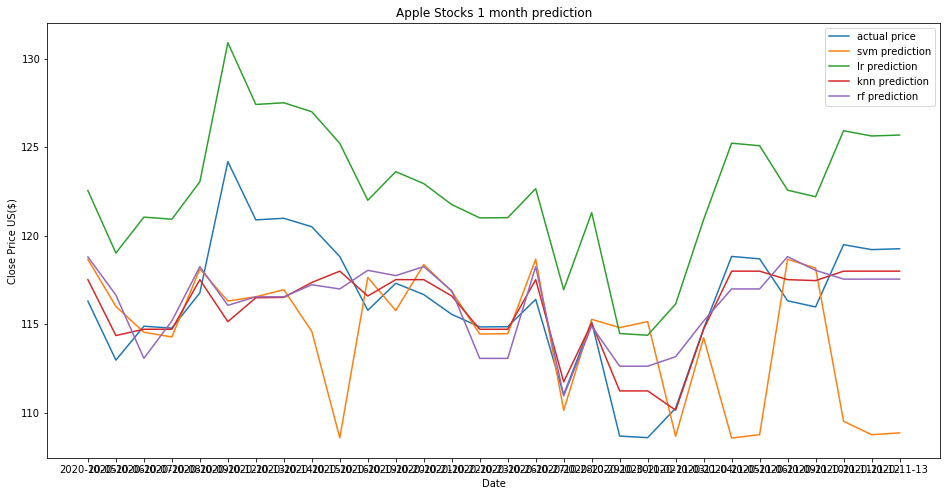

In [35]:
plt.figure(figsize=(16,8))
plt.title('Apple Stocks 1 month prediction')
plt.plot(predict_table['Date'], predict_table['Close'],label = 'actual price')
plt.plot(predict_table['Date'], predict_table['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table['Date'], predict_table['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table['Date'], predict_table['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table['Date'], predict_table['y_rf_pred'],label = 'rf prediction')
plt.xlabel('Date')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

In [41]:
print("Linear Regression confidence: ", lr_confidence)
print("SVM confidence: ", svm_confidence)
print("KNN confidence: ", knn_confidence)
print("rf confidence: ", rf_confidence)

Linear Regression confidence:  0.9235279376985549
SVM confidence:  0.941374874954749
KNN confidence:  0.943291588144264
rf confidence:  0.9399468358571345


#### reference
1. https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b
2. https://towardsdatascience.com/an-introduction-to-random-forest-using-tesla-stock-prices-d9c6e113be3c
3. https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a